<a href="https://colab.research.google.com/github/kenclements/praxis/blob/main/adaboost-twos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Feb 20 20:36:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import string
import re

#Vectorization and Tokenizing
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler



#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression


#Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [4]:

# file1 = pd.read_csv('/Data/TWOS-dataset/email_ano/User1.csv')
# file2 = pd.read_csv('/Data/TWOS-dataset/email_ano/User2.csv')
# file3 = pd.read_csv('/Data/TWOS-dataset/email_ano/User3.csv')
# file4 = pd.read_csv('/Data/TWOS-dataset/email_ano/User4.csv')
# file6 = pd.read_csv('/Data/TWOS-dataset/email_ano/User6.csv')
# file7 = pd.read_csv('/Data/TWOS-dataset/email_ano/User7.csv')
# file8 = pd.read_csv('/Data/TWOS-dataset/email_ano/User8.csv')
# file9 = pd.read_csv('/Data/TWOS-dataset/email_ano/User9.csv')
# file10 = pd.read_csv('/Data/TWOS-dataset/email_ano/User10.csv')
# file11 = pd.read_csv('/Data/TWOS-dataset/email_ano/User11.csv')
# file12 = pd.read_csv('/Data/TWOS-dataset/email_ano/User12.csv')
# file13 = pd.read_csv('/Data/TWOS-dataset/email_ano/User13.csv')
# file14 = pd.read_csv('/Data/TWOS-dataset/email_ano/User14.csv')
# file15 = pd.read_csv('/Data/TWOS-dataset/email_ano/User15.csv')
# file16 = pd.read_csv('/Data/TWOS-dataset/email_ano/User16.csv')
# file17 = pd.read_csv('/Data/TWOS-dataset/email_ano/User17.csv')
# file18 = pd.read_csv('/Data/TWOS-dataset/email_ano/User18.csv')
# file19 = pd.read_csv('/Data/TWOS-dataset/email_ano/User19.csv')
# file20 = pd.read_csv('/Data/TWOS-dataset/email_ano/User20.csv')
# file21 = pd.read_csv('/Data/TWOS-dataset/email_ano/User21.csv')
# file22 = pd.read_csv('/Data/TWOS-dataset/email_ano/User22.csv')
# file23 = pd.read_csv('/Data/TWOS-dataset/email_ano/User23.csv')
# combined = pd.read_csv('/Data/TWOS-dataset/email_ano/combined.csv')
#test = pd.read_csv('/Data/TWOS-dataset/email_ano/test.csv')
#train = pd.read_csv('/Data/TWOS-dataset/email_ano/train.csv')
#imdb = pd.read_csv('/Data/TWOS-dataset/email_ano/IMDB Dataset.csv')
imdb = pd.read_csv('/content/drive/MyDrive/Praxis/data/IMDB Dataset.csv')



In [5]:
df = imdb
#df = pd.concat([file1, file2, file3, file4, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15, file16, file17, file18, file19, file20, file21, file22, file23])

In [6]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
df.rename(columns={"review": "body_anon", "sentiment": "label"}, inplace=True)

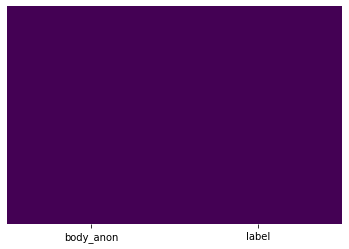

In [8]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df['label']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: label, Length: 50000, dtype: object

In [10]:
df.dropna(subset=['label'], inplace=True)


In [11]:
#df['body_anon'] = df['body_anon'].astype(str)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


In [13]:
df

,body_anon,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [14]:
def prep(dfx):
    dfx1 = [re.sub(r'[^\w\s]','', x) for x in dfx]
    dfx1 = ''.join(dfx1)
    return(dfx1)

#df1 = df['body_anon'].apply(prep)

In [15]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
#print(stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words);

    return(joined)

    #ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
    
#df['tokenized'] = df['body_anon'].apply(prepare_text)
df['tokenized'] = df['body_anon']



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
df.head(1)


,body_anon,label,tokenized
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...


In [20]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(stop_words=None, analyzer='word' )

In [21]:
#count_wm = countvectorizer.fit_transform(df['body_anon'])
tfidf_wm = tfidfvectorizer.fit_transform(df['tokenized'])


In [22]:
#count_tokens = countvectorizer.get_feature_names_out()
#tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [23]:
# df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
# df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
# print("Count Vectorizer\n")
# print(df_countvect)
# print("\nTD-IDF Vectorizer\n")
# print(df_tfidfvect)

In [24]:
df = df.reset_index(drop=True)


In [25]:
print(df.loc[50, 'tokenized'])

Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western's Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.<br /><br />This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can't do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got expo

In [26]:

print(tfidf_wm[50])


  (0, 51299)	0.054683892006654626
  (0, 62908)	0.058872287235505916
  (0, 59409)	0.06713232156995785
  (0, 79310)	0.05315711285633525
  (0, 74775)	0.05436901288184054
  (0, 33924)	0.04672883383032488
  (0, 61510)	0.09808897640617359
  (0, 2399)	0.054944152333115025
  (0, 68311)	0.07337545319966898
  (0, 99840)	0.08306046568535255
  (0, 101173)	0.07514450149005167
  (0, 60212)	0.04363535833772402
  (0, 66652)	0.06351412127101709
  (0, 88663)	0.058371261606752614
  (0, 4702)	0.05138071510468916
  (0, 86730)	0.0557744765186845
  (0, 81442)	0.058820883717999733
  (0, 66342)	0.06221774564909705
  (0, 84340)	0.07694990314442372
  (0, 17511)	0.06472877806256605
  (0, 41987)	0.05216382250549023
  (0, 4700)	0.08390068956682463
  (0, 99245)	0.048653838502669876
  (0, 74052)	0.05206799897209673
  (0, 92423)	0.050950596714394836
  :	:
  (0, 91217)	0.12174604506727962
  (0, 64417)	0.016620168967150586
  (0, 34443)	0.03543622370014106
  (0, 44763)	0.09940588818536832
  (0, 98951)	0.03896548974138673

In [27]:
#transformer = MaxAbsScaler().fit(tfidf_wm)
#tfidf_wm = transformer.transform(tfidf_wm)

In [28]:
print(tfidf_wm[50])

  (0, 51299)	0.054683892006654626
  (0, 62908)	0.058872287235505916
  (0, 59409)	0.06713232156995785
  (0, 79310)	0.05315711285633525
  (0, 74775)	0.05436901288184054
  (0, 33924)	0.04672883383032488
  (0, 61510)	0.09808897640617359
  (0, 2399)	0.054944152333115025
  (0, 68311)	0.07337545319966898
  (0, 99840)	0.08306046568535255
  (0, 101173)	0.07514450149005167
  (0, 60212)	0.04363535833772402
  (0, 66652)	0.06351412127101709
  (0, 88663)	0.058371261606752614
  (0, 4702)	0.05138071510468916
  (0, 86730)	0.0557744765186845
  (0, 81442)	0.058820883717999733
  (0, 66342)	0.06221774564909705
  (0, 84340)	0.07694990314442372
  (0, 17511)	0.06472877806256605
  (0, 41987)	0.05216382250549023
  (0, 4700)	0.08390068956682463
  (0, 99245)	0.048653838502669876
  (0, 74052)	0.05206799897209673
  (0, 92423)	0.050950596714394836
  :	:
  (0, 91217)	0.12174604506727962
  (0, 64417)	0.016620168967150586
  (0, 34443)	0.03543622370014106
  (0, 44763)	0.09940588818536832
  (0, 98951)	0.03896548974138673

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(tfidf_wm, df['label'], test_size=.3) # 70% training and 30% test


**This is the Keras TF-IDF vectorization method**

In [30]:
# text_vectorizer = layers.TextVectorization(output_mode="tf-idf", ngrams=1)
# text_vectorizer.adapt(df['tokenized'])
# keras_vector = text_vectorizer(df['tokenized']).numpy()
# X_train, X_test, y_train, y_test = train_test_split(keras_vector, df['label'], test_size=.5) # 70% training and 30% test


ADABOOST MODEL

In [31]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) 
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.799


In [33]:
confusion_matrix(y_test, y_pred)

array([[5757, 1823],
       [1192, 6228]])

KNN Model

In [33]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 5):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [34]:
scores

{2: [0.9778571428571429, 0.5562666666666667],
 3: [0.9632285714285714, 0.5599333333333333],
 4: [0.694, 0.5334]}

In [35]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [36]:
y_pred

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [37]:
confusion_matrix(y_test, y_pred)

array([[7104,  513],
       [6143, 1240]])

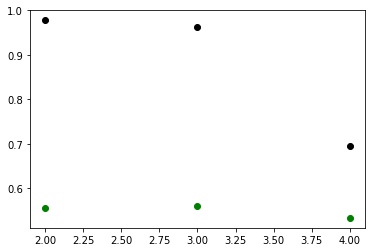

In [38]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots

In [40]:
svm = SVC(kernel="poly", degree=1, gamma="scale")

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array(['ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', '

In [ ]:
confusion_matrix(y_test, y_pred)

array([[568, 118],
       [268,  34]], dtype=int64)

In [ ]:
y_train_hat_probs = lr.predict_proba(X_test)[:,1]

In [ ]:
y_train_hat_probs

array([0.06254675, 0.39873437, 0.38622409, 0.16437957, 0.27118015,
       0.09082793, 0.22177007, 0.3047803 , 0.74999706, 0.12030163,
       0.07690702, 0.18789929, 0.17631081, 0.71111919, 0.19157066,
       0.32249168, 0.39420616, 0.08135514, 0.33479679, 0.18789929,
       0.28760859, 0.18839503, 0.35866357, 0.3501188 , 0.51786023,
       0.2262678 , 0.06795492, 0.62137464, 0.32363805, 0.37629627,
       0.05514744, 0.09300598, 0.05230964, 0.27196844, 0.59733011,
       0.66776475, 0.12095157, 0.22004842, 0.08964282, 0.1875837 ,
       0.07633292, 0.0998339 , 0.0998339 , 0.45318377, 0.217011  ,
       0.05392922, 0.6333798 , 0.12030163, 0.29406105, 0.27106098,
       0.06254675, 0.38811878, 0.22479854, 0.14750043, 0.32481842,
       0.25215624, 0.19955267, 0.32392189, 0.45318377, 0.16437957,
       0.05688438, 0.1285301 , 0.03484654, 0.6354735 , 0.10721706,
       0.40718089, 0.0394385 , 0.14099028, 0.67362624, 0.24124279,
       0.14343168, 0.04519313, 0.70235497, 0.0639797 , 0.63547

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test.toarray())

In [ ]:
y_pred

array(['ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'NORMAL',
       'ANOMALY', 'NORMAL', 'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'ANOMALY', 'ANOMAL

In [ ]:
confusion_matrix(y_test, y_pred)

array([[259, 427],
       [184, 118]], dtype=int64)

In [ ]:
lr1 = LinearRegression()

In [ ]:
y_train1 = y_train.astype("category").cat.codes
y_test1 = y_test.astype("category").cat.codes


In [ ]:
lr1.fit(X_train, y_train1)

LinearRegression()

In [ ]:
y_pred = lr1.predict(X_test)

In [ ]:
y_pred

array([ 4.15318610e-08,  6.00562242e-01,  3.67019931e-01,  1.42857122e-01,
        2.49999992e-01,  2.12534043e-08,  1.99999967e-01,  1.71863880e-01,
        1.00000009e+00,  3.95285245e-08, -3.29409632e-08, -9.22764676e-09,
       -8.84050379e-08,  1.12944633e+00,  2.00000032e-01,  8.68186983e-08,
        4.15931365e-01, -1.05452880e-09,  3.65829576e-01, -9.22764676e-09,
        4.36346289e-08,  1.66666684e-01,  4.03188524e-01,  5.42755864e-01,
        3.90934894e-01, -8.14676437e-10, -3.73970008e-08,  1.00000012e+00,
        3.33333331e-01,  4.77596839e-01, -3.96940993e-08,  9.94756605e-09,
       -2.06690882e-08,  8.56867901e-08,  9.99999929e-01,  9.99999971e-01,
        8.43917191e-02,  1.79905585e-08, -5.81728887e-08,  1.66666680e-01,
        4.02918642e-08,  1.24980533e-08,  1.24980533e-08,  5.80729189e-01,
        1.99999987e-01,  7.32595590e-09,  1.00000010e+00,  3.95285245e-08,
        5.48053566e-01,  1.54484351e-08,  4.15318610e-08,  3.33333327e-01,
        5.09931697e-02,  

In [ ]:
y_pred_lr1 = []
i = 0
for x in y_pred:
    if ( y_pred[i] <= 0 ):
         y_pred_lr1.append(1)
    else:
        y_pred_lr1.append(0)
i += 1


In [ ]:
y_pred_lr1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
confusion_matrix(y_test1, y_pred_lr1)

array([[686,   0],
       [302,   0]], dtype=int64)